### Introdcution : 

Learn how to use tensorflow to make simple feedforward nural networks for image classification. I have used MNIST Dataset of handwritten digits for the purpose. 

At the end, i use confusion matrix to get an idea of the incorrectly classified images and see if it makes any sense. Since, it's image dataset we can have a good intution about why some of the the images were incorrectly classified. 

### Code :

In [1]:
import tensorflow as tf

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Load the data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [3]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
#Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
#Train the model

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/sample - loss: 2.4388 - accuracy: 0.7456 - val_loss: 0.5646 - val_accuracy: 0.8637
Epoch 2/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5946 - accuracy: 0.8443 - val_loss: 0.3952 - val_accuracy: 0.9111
Epoch 3/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4759 - accuracy: 0.8759 - val_loss: 0.3802 - val_accuracy: 0.9188
Epoch 4/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4099 - accuracy: 0.8934 - val_loss: 0.2841 - val_accuracy: 0.9354
Epoch 5/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3934 - accuracy: 0.8997 - val_loss: 0.2763 - val_accuracy: 0.9376
Epoch 6/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3698 - accuracy: 0.9057 - val_loss: 0.2712 - val_accuracy: 0.9399
Epoch 7/20
60000/60000 [=========================

In [6]:
#Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

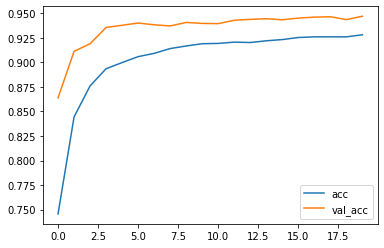

In [7]:
#Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [8]:
#Evaluate the model

print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34038912415243683, 0.9468]
Confusion matrix, without normalizaion
[[ 957    1    0    2    0    0    2    1   17    0]
 [   0 1103    5    0    0    1    1    0   24    1]
 [   1    3  947    5    1    1    4   14   54    2]
 [   0    0    7  959    0   11    0    2   26    5]
 [   2    4    7    1  923    0    6    0   16   23]
 [   5    0    0   20    1  822   13    2   24    5]
 [  10    3    2    1    4    8  914    0   15    1]
 [   1    5   12    5    3    0    0  976   12   14]
 [   4    2    3    1    5    7    6    5  937    4]
 [   1    5    0    9   15    4    1   10   34  930]]


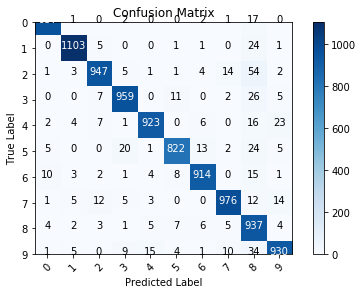

In [9]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', 
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.Normalization can be 
    applied by setting 'normalize=True'
    """
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalizaion")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', 
                 color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

    

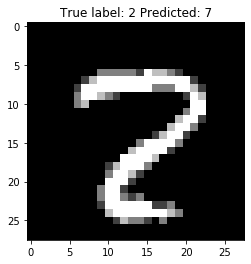

In [10]:
#Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));